# Activities of Daily Living Recognition using Naive Bayes Classifier

Author: Amer Altizini
Purpose: CT1 group-work project
Date: 10.06.2022
Information:
- Cells that are within the same section need to run subsequently

### Importing all the python packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import glob
import os.path
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from functions import plotting_ACC, plotting_GYRO, show_values, evaluate
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
# Create all settings:
# ACC = 50Hz, Gyroscope=50Hz
# Code to increase plot size
# Increase image size
matplotlib.rcParams['figure.figsize'] = [30, 10]
# Increase font size
matplotlib.rcParams['font.size'] = 14

classification accuracy = x %
classification accuracy = x %
classification accuracy = x %
classification accuracy = x %
classification accuracy = x %
classification accuracy = x %
classification accuracy = x %
classification accuracy = x %
classification accuracy = x %
classification accuracy = x %
classification accuracy = x %
classification accuracy = x %
classification accuracy = x %
classification accuracy = x %
classification accuracy = x %
classification accuracy = x %
classification accuracy = x %
classification accuracy = x %
classification accuracy = x %
classification accuracy = x %
classification accuracy = x %
classification accuracy = x %
classification accuracy = x %
classification accuracy = x %
classification accuracy = x %
classification accuracy = x %
classification accuracy = x %
classification accuracy = x %
classification accuracy = x %
classification accuracy = x %
classification accuracy = x %
classification accuracy = x %
classification accuracy = x %
classifica

### Load and append participant data

In [2]:
# Read phone_watch_sensor Fusion data and append the datasets (p1-p10)
path_to_data = "./data/"
all_files = glob.glob(path_to_data +"*.ctm")
AllFiles = []
p1 = pd.read_csv(r'data\p1_phone_watch_sensorFusion.ctm')

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    df['Name File'] = os.path.basename(filename)
    AllFiles.append(df)
All_datasets = pd.concat(AllFiles, axis=0, ignore_index=True)

All_datasets

,#->Timestamp,label,phone_TYPE_ACCELEROMETER-X,phone_TYPE_ACCELEROMETER-Y,phone_TYPE_ACCELEROMETER-Z,phone_TYPE_GYROSCOPE-X,phone_TYPE_GYROSCOPE-Y,phone_TYPE_GYROSCOPE-Z,watch_TYPE_ACCELEROMETER-X,watch_TYPE_ACCELEROMETER-Y,watch_TYPE_ACCELEROMETER-Z,watch_TYPE_GYROSCOPE-X,watch_TYPE_GYROSCOPE-Y,watch_TYPE_GYROSCOPE-Z,Name File
0,0.351,sitting,1.506607,9.826767,0.456100,0.270584,-0.028564,-0.051651,-9.014449,-2.896305,1.440971,-0.191763,-0.031960,0.106535,p10_phone_watch_sensorFusion.ctm
1,0.352,sitting,1.506607,9.826767,0.456100,0.270584,-0.028564,-0.051651,-9.014449,-2.886730,1.421822,-0.191763,-0.031960,0.106535,p10_phone_watch_sensorFusion.ctm
2,0.353,sitting,1.506607,9.826767,0.456100,0.270584,-0.028564,-0.051651,-9.004874,-2.953752,1.440971,-0.191763,-0.031960,0.106535,p10_phone_watch_sensorFusion.ctm
3,0.354,sitting,1.508545,9.769363,0.479858,0.284470,-0.044281,-0.052750,-8.995299,-2.934603,1.498419,-0.191763,-0.031960,0.106535,p10_phone_watch_sensorFusion.ctm
4,0.355,sitting,1.508545,9.769363,0.479858,0.284470,-0.044281,-0.052750,-8.985725,-2.905879,1.536717,-0.191763,-0.031960,0.106535,p10_phone_watch_sensorFusion.ctm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2458409,3189.781,vacuum,-0.351486,10.073776,0.200562,0.914398,0.748779,-0.122467,-9.081471,-1.996296,1.383524,-0.167792,0.125179,-0.295634,p9_phone_watch_sensorFusion.ctm
2458410,3189.782,vacuum,-0.351486,10.073776,0.200562,0.914398,0.748779,-0.122467,-9.225089,-1.785656,1.326077,-0.167792,0.125179,-0.295634,p9_phone_watch_sensorFusion.ctm
2458411,3189.783,vacuum,-0.351486,10.073776,0.200562,0.914398,0.748779,-0.122467,-9.502751,-1.737783,1.402673,-0.167792,0.125179,-0.295634,p9_phone_watch_sensorFusion.ctm
2458412,3189.784,vacuum,-0.351486,10.073776,0.200562,0.914398,0.748779,-0.122467,-9.560199,-1.785656,1.335651,-0.167792,0.125179,-0.295634,p9_phone_watch_sensorFusion.ctm


## Activity data analysis

### Label count visualization

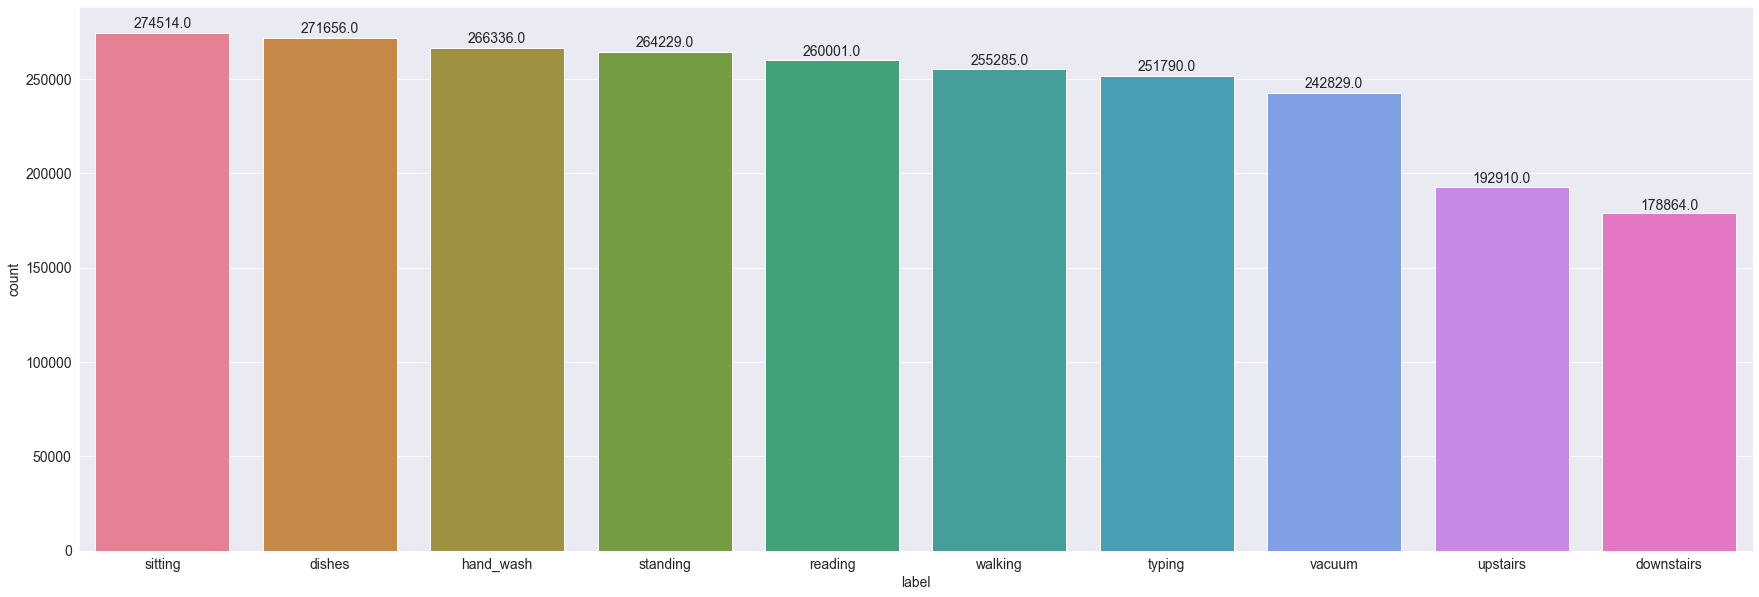

In [3]:
ax = sns.countplot(x="label", data=All_datasets, palette="husl", order = All_datasets['label'].value_counts().index)
show_values(ax)

## Encoding labels and participants name to pass the dataset into the ML algorithm

In [4]:
encoder = LabelEncoder()
All_datasets['encoded_label'] = encoder.fit_transform(All_datasets['label'])
# to know which code belong to which label
display(All_datasets['label'].value_counts())
display(All_datasets['encoded_label'].value_counts())
display(All_datasets.label.unique())

sitting       274514
dishes        271656
hand_wash     266336
standing      264229
reading       260001
walking       255285
typing        251790
vacuum        242829
upstairs      192910
downstairs    178864
Name: label, dtype: int64

4    274514
0    271656
2    266336
5    264229
3    260001
9    255285
6    251790
8    242829
7    192910
1    178864
Name: encoded_label, dtype: int64

array(['sitting', 'standing', 'walking', 'downstairs', 'upstairs',
       'typing', 'reading', 'hand_wash', 'dishes', 'vacuum'], dtype=object)

In [5]:
All_datasets['Name_File'] = encoder.fit_transform(All_datasets['Name File'])
# to know which code belong to which label
display(All_datasets['Name File'].value_counts())
display(All_datasets['Name_File'].value_counts())
display(All_datasets.label.unique())

p2_phone_watch_sensorFusion.ctm     275496
p10_phone_watch_sensorFusion.ctm    267523
p4_phone_watch_sensorFusion.ctm     256769
p6_phone_watch_sensorFusion.ctm     245013
p8_phone_watch_sensorFusion.ctm     243625
p3_phone_watch_sensorFusion.ctm     239838
p7_phone_watch_sensorFusion.ctm     238620
p1_phone_watch_sensorFusion.ctm     236583
p5_phone_watch_sensorFusion.ctm     229342
p9_phone_watch_sensorFusion.ctm     225605
Name: Name File, dtype: int64

2    275496
0    267523
4    256769
6    245013
8    243625
3    239838
7    238620
1    236583
5    229342
9    225605
Name: Name_File, dtype: int64

array(['sitting', 'standing', 'walking', 'downstairs', 'upstairs',
       'typing', 'reading', 'hand_wash', 'dishes', 'vacuum'], dtype=object)

## Visualization of missing values counts for each feature

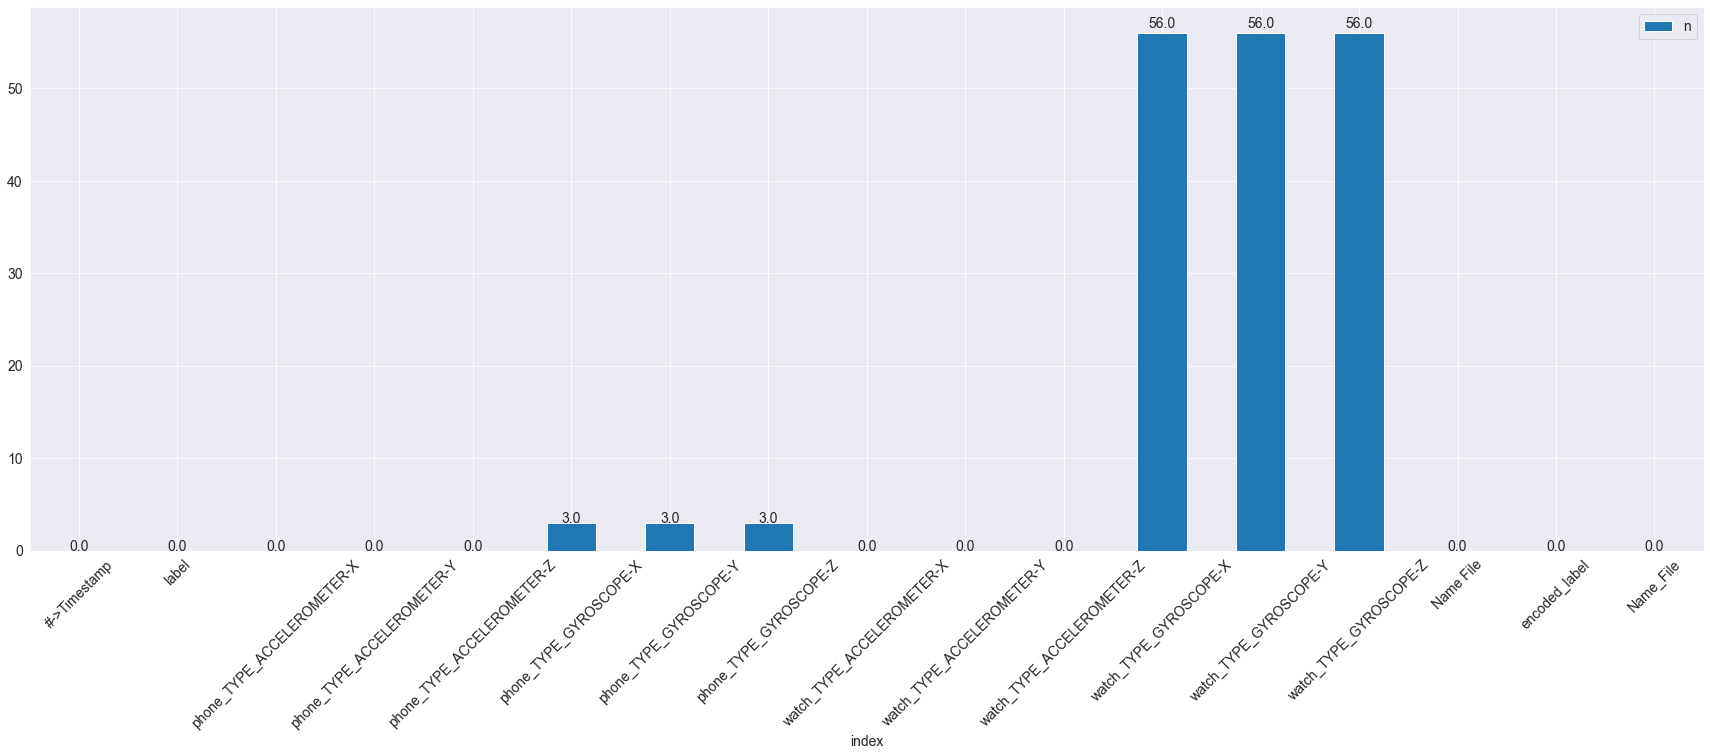

In [6]:
missing_values_count = All_datasets.isna().sum().reset_index(name="n").plot.bar(x='index', y='n', rot=45)
show_values(missing_values_count)

In [7]:
# delete the label column
All_datasets_Copy = All_datasets.copy()
All_datasets_Copy = All_datasets_Copy.drop(['label','Name File'], axis=1)

## Handling missing data (NaN) with the mean value

In [8]:
Imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
Imputer.fit(All_datasets_Copy)
All_datasets_withoutNaN = Imputer.transform(All_datasets_Copy)

In [9]:
# adding column name to the respective columns and convert from numpy array to pandas dataframe due to imputer conversion
All_datasets_withoutNaN = pd.DataFrame(All_datasets_withoutNaN, columns = ['#->Timestamp', 'phone_TYPE_ACCELEROMETER-X', 'phone_TYPE_ACCELEROMETER-Y', 'phone_TYPE_ACCELEROMETER-Z', 'phone_TYPE_GYROSCOPE-X', 'phone_TYPE_GYROSCOPE-Y', 'phone_TYPE_GYROSCOPE-Z', 'watch_TYPE_ACCELEROMETER-X', 'watch_TYPE_ACCELEROMETER-Y', 'watch_TYPE_ACCELEROMETER-Z', 'watch_TYPE_GYROSCOPE-X', 'watch_TYPE_GYROSCOPE-Y', 'watch_TYPE_GYROSCOPE-Z', 'encoded_label', 'Name_File'])
All_datasets_withoutNaN
# checking there is no NaN values
# All_datasets_withoutNaN.isna().sum()

,#->Timestamp,phone_TYPE_ACCELEROMETER-X,phone_TYPE_ACCELEROMETER-Y,phone_TYPE_ACCELEROMETER-Z,phone_TYPE_GYROSCOPE-X,phone_TYPE_GYROSCOPE-Y,phone_TYPE_GYROSCOPE-Z,watch_TYPE_ACCELEROMETER-X,watch_TYPE_ACCELEROMETER-Y,watch_TYPE_ACCELEROMETER-Z,watch_TYPE_GYROSCOPE-X,watch_TYPE_GYROSCOPE-Y,watch_TYPE_GYROSCOPE-Z,encoded_label,Name_File
0,0.351,1.506607,9.826767,0.456100,0.270584,-0.028564,-0.051651,-9.014449,-2.896305,1.440971,-0.191763,-0.031960,0.106535,4.0,0.0
1,0.352,1.506607,9.826767,0.456100,0.270584,-0.028564,-0.051651,-9.014449,-2.886730,1.421822,-0.191763,-0.031960,0.106535,4.0,0.0
2,0.353,1.506607,9.826767,0.456100,0.270584,-0.028564,-0.051651,-9.004874,-2.953752,1.440971,-0.191763,-0.031960,0.106535,4.0,0.0
3,0.354,1.508545,9.769363,0.479858,0.284470,-0.044281,-0.052750,-8.995299,-2.934603,1.498419,-0.191763,-0.031960,0.106535,4.0,0.0
4,0.355,1.508545,9.769363,0.479858,0.284470,-0.044281,-0.052750,-8.985725,-2.905879,1.536717,-0.191763,-0.031960,0.106535,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2458409,3189.781,-0.351486,10.073776,0.200562,0.914398,0.748779,-0.122467,-9.081471,-1.996296,1.383524,-0.167792,0.125179,-0.295634,8.0,9.0
2458410,3189.782,-0.351486,10.073776,0.200562,0.914398,0.748779,-0.122467,-9.225089,-1.785656,1.326077,-0.167792,0.125179,-0.295634,8.0,9.0
2458411,3189.783,-0.351486,10.073776,0.200562,0.914398,0.748779,-0.122467,-9.502751,-1.737783,1.402673,-0.167792,0.125179,-0.295634,8.0,9.0
2458412,3189.784,-0.351486,10.073776,0.200562,0.914398,0.748779,-0.122467,-9.560199,-1.785656,1.335651,-0.167792,0.125179,-0.295634,8.0,9.0


### convert encoded_label column from float to string to classify the labels and visualize them

In [15]:
All_datasets_withoutNaN['encoded_label'] = All_datasets_withoutNaN['encoded_label'].astype(str)
# filtering sensor data for specific activities
sitting = All_datasets_withoutNaN.query('encoded_label == "4.0"')
standing = All_datasets_withoutNaN.query('encoded_label in ["5.0"]')
walking = All_datasets_withoutNaN.query('encoded_label == "9.0"')
downstairs = All_datasets_withoutNaN.query('encoded_label == "1.0"')
upstairs = All_datasets_withoutNaN.query('encoded_label == "7.0"')
typing = All_datasets_withoutNaN.query('encoded_label == "6.0"')
reading = All_datasets_withoutNaN.query('encoded_label == "3.0"')
hand_wash = All_datasets_withoutNaN.query('encoded_label == "2.0"')
dishes = All_datasets_withoutNaN.query('encoded_label == "0.0"')
vacuum = All_datasets_withoutNaN.query('encoded_label == "8.0"')
All_datasets_withoutNaN.dtypes

#->Timestamp                  float64
phone_TYPE_ACCELEROMETER-X    float64
phone_TYPE_ACCELEROMETER-Y    float64
phone_TYPE_ACCELEROMETER-Z    float64
phone_TYPE_GYROSCOPE-X        float64
phone_TYPE_GYROSCOPE-Y        float64
phone_TYPE_GYROSCOPE-Z        float64
watch_TYPE_ACCELEROMETER-X    float64
watch_TYPE_ACCELEROMETER-Y    float64
watch_TYPE_ACCELEROMETER-Z    float64
watch_TYPE_GYROSCOPE-X        float64
watch_TYPE_GYROSCOPE-Y        float64
watch_TYPE_GYROSCOPE-Z        float64
encoded_label                  object
Name_File                      object
dtype: object

In [16]:
All_datasets_withoutNaN['Name_File'] = All_datasets_withoutNaN['Name_File'].astype(str)
# filtering sensor data for specific activities
p_1 = All_datasets_withoutNaN.query('Name_File == "1.0"')
p_2 = All_datasets_withoutNaN.query('Name_File in ["2.0"]')
p_3 = All_datasets_withoutNaN.query('Name_File == "3.0"')
p_4 = All_datasets_withoutNaN.query('Name_File == "4.0"')
p_5 = All_datasets_withoutNaN.query('Name_File == "5.0"')
p_6 = All_datasets_withoutNaN.query('Name_File == "6.0"')
p_7 = All_datasets_withoutNaN.query('Name_File == "7.0"')
p_8 = All_datasets_withoutNaN.query('Name_File == "8.0"')
p_9 = All_datasets_withoutNaN.query('Name_File == "9.0"')
p_10 = All_datasets_withoutNaN.query('Name_File == "0.0"')
All_datasets_withoutNaN.dtypes

#->Timestamp                  float64
phone_TYPE_ACCELEROMETER-X    float64
phone_TYPE_ACCELEROMETER-Y    float64
phone_TYPE_ACCELEROMETER-Z    float64
phone_TYPE_GYROSCOPE-X        float64
phone_TYPE_GYROSCOPE-Y        float64
phone_TYPE_GYROSCOPE-Z        float64
watch_TYPE_ACCELEROMETER-X    float64
watch_TYPE_ACCELEROMETER-Y    float64
watch_TYPE_ACCELEROMETER-Z    float64
watch_TYPE_GYROSCOPE-X        float64
watch_TYPE_GYROSCOPE-Y        float64
watch_TYPE_GYROSCOPE-Z        float64
encoded_label                  object
Name_File                      object
dtype: object

In [17]:
# All_datasets_withoutNaN drop timestamp column
withoutTS = All_datasets_withoutNaN.drop(['#->Timestamp','Name_File'], axis=1)

## Analyzing Accelerometer Signal

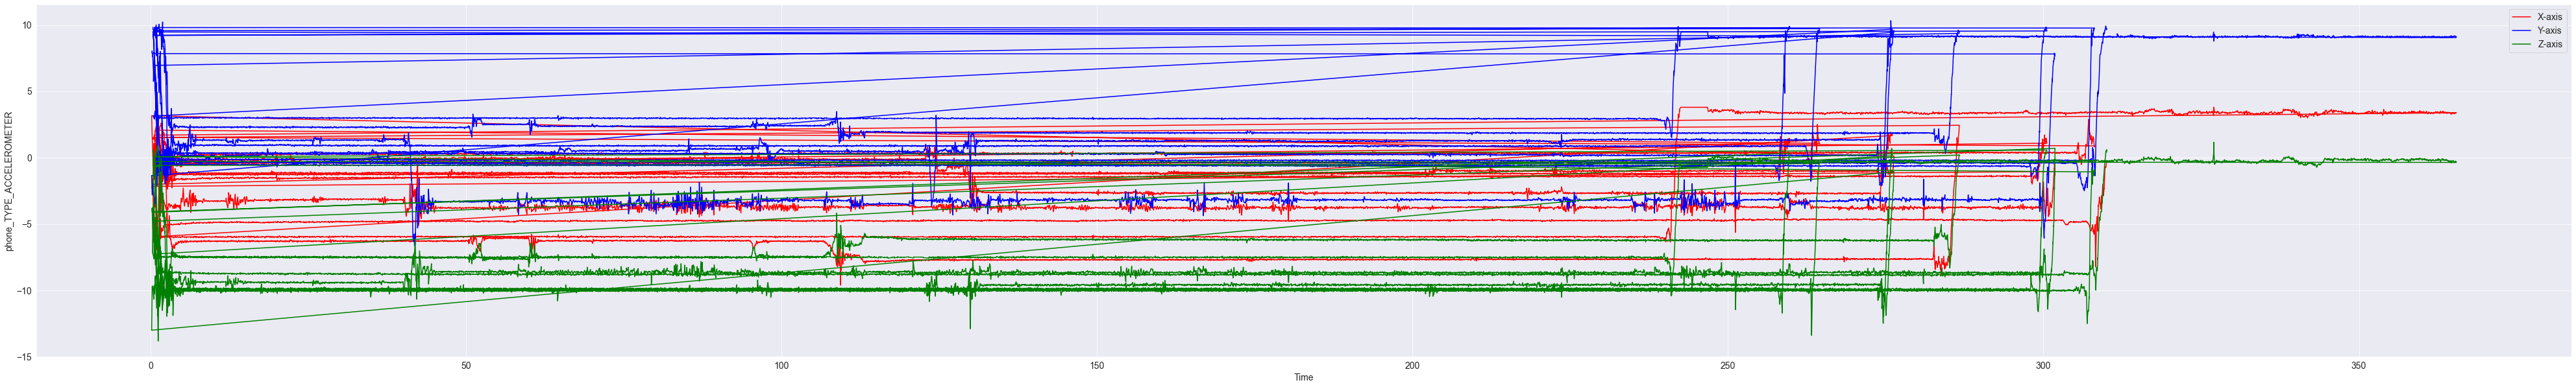

In [18]:
plotting_ACC(sitting, "phone_TYPE_ACCELEROMETER")
# activity_list = [sitting, standing, walking, downstairs, upstairs, typing, reading, hand_wash, dishes,vacuum]
# for i in range(len(activity_list)):
#     plotting_GYRO(activity_list[i], "phone_TYPE_GYROSCOPE")

## Analyzing Gyroscope Signal

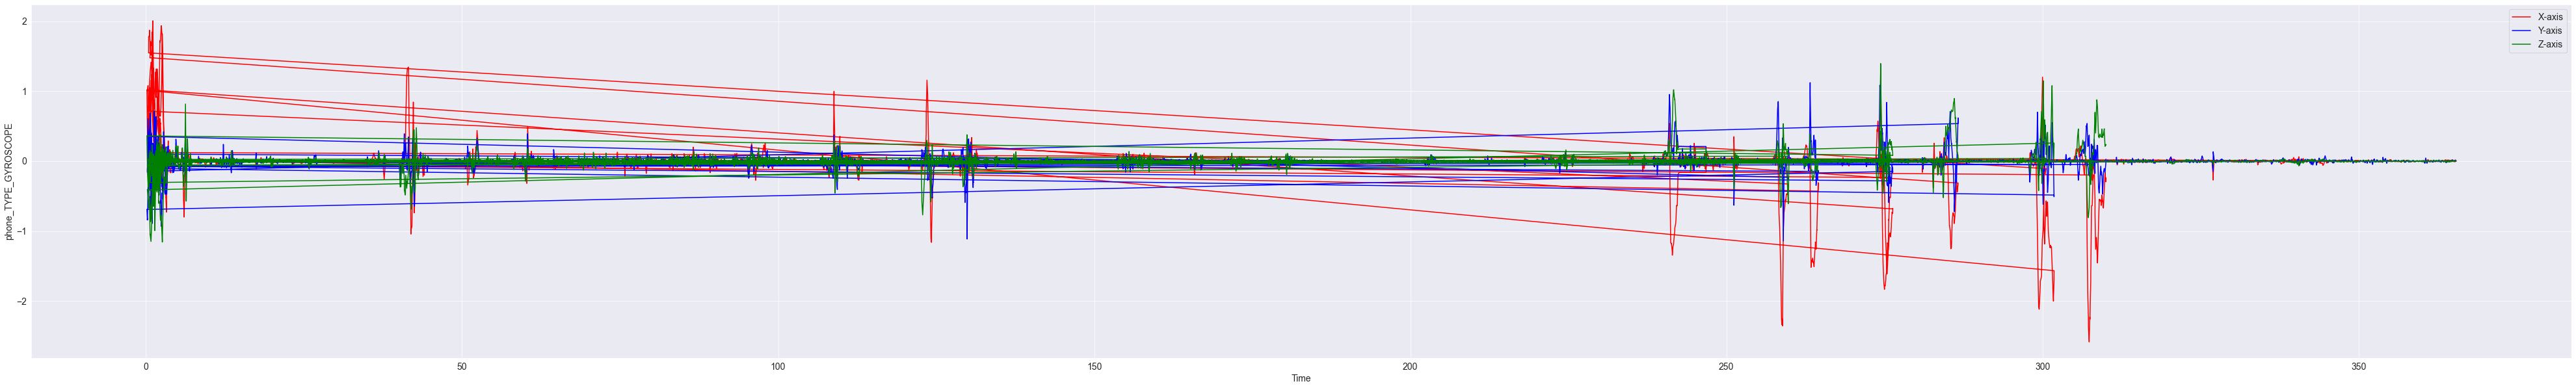

In [19]:
plotting_GYRO(sitting, "phone_TYPE_GYROSCOPE")

### Descriptive statistics

,phone_TYPE_ACCELEROMETER-X,phone_TYPE_ACCELEROMETER-Y,phone_TYPE_ACCELEROMETER-Z,phone_TYPE_GYROSCOPE-X,phone_TYPE_GYROSCOPE-Y,phone_TYPE_GYROSCOPE-Z,watch_TYPE_ACCELEROMETER-X,watch_TYPE_ACCELEROMETER-Y,watch_TYPE_ACCELEROMETER-Z,watch_TYPE_GYROSCOPE-X,watch_TYPE_GYROSCOPE-Y,watch_TYPE_GYROSCOPE-Z
count,2.458414e+06,2.458414e+06,2.458414e+06,2.458414e+06,2.458414e+06,2.458414e+06,2.458414e+06,2.458414e+06,2.458414e+06,2.458414e+06,2.458414e+06,2.458414e+06
mean,-1.872269e-01,6.689228e+00,-3.575645e+00,-5.471611e-05,-4.071512e-03,-1.164186e-02,-4.749332e+00,-4.222643e+00,2.610945e+00,-1.050597e-03,-7.943137e-03,9.765179e-05
std,2.493637e+00,4.470899e+00,4.347110e+00,7.254871e-01,6.076788e-01,3.088052e-01,4.452643e+00,2.828450e+00,4.820425e+00,1.007364e+00,4.124490e-01,5.655100e-01
min,-1.887924e+01,-9.846176e+00,-1.965982e+01,-6.142456e+00,-1.090793e+01,-4.772308e+00,-1.960391e+01,-1.959434e+01,-1.960391e+01,-1.974092e+01,-8.733198e+00,-6.477322e+00
25%,-1.486649e+00,2.646439e+00,-8.794903e+00,-1.768494e-02,-3.533936e-02,-7.598877e-03,-8.526146e+00,-6.065484e+00,-2.633004e-01,-1.571390e-01,-9.055467e-02,-9.321804e-02
50%,1.410370e-01,9.121925e+00,-1.978180e+00,7.629395e-05,-1.373291e-04,-3.051758e-05,-4.648449e+00,-3.719717e+00,1.766506e+00,0.000000e+00,-2.663373e-03,0.000000e+00
75%,1.517487e+00,9.642166e+00,-3.683090e-02,1.081848e-02,2.772522e-02,1.116943e-02,-7.899013e-01,-2.264384e+00,7.808054e+00,1.624657e-01,8.256455e-02,8.789130e-02
max,1.944449e+01,1.950000e+01,1.933958e+01,5.044723e+00,8.608276e+00,4.716293e+00,1.959434e+01,1.960391e+01,1.959434e+01,3.204836e+01,5.289458e+00,8.631990e+00


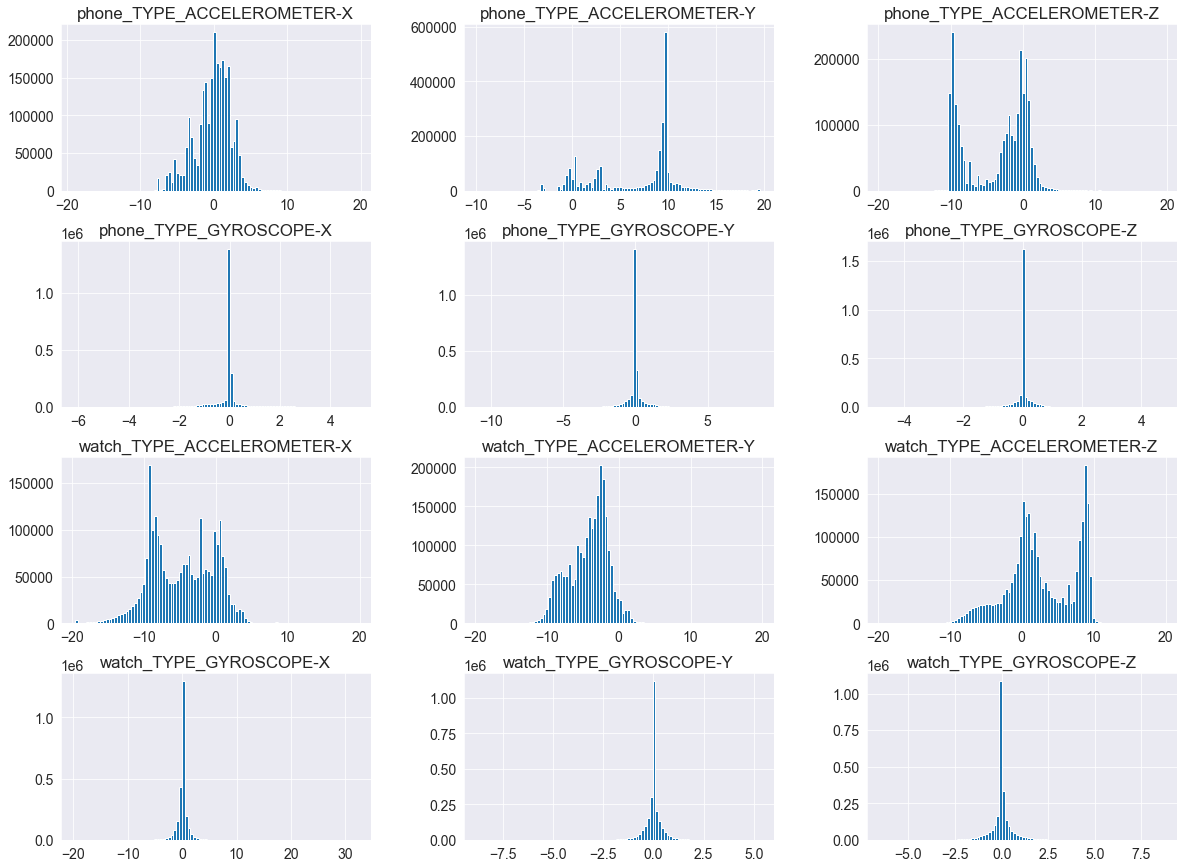

In [20]:
## data distribution before removing outliers
data_distribution_before = withoutTS.hist(bins=100, figsize = (20,15))
withoutTS.describe()

## apply sliding window and feature extraction

In [21]:
withoutLabelDF=withoutTS.iloc[:,:-1]

In [22]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [23]:
target_names = ['sitting', 'standing', 'walking', 'downstairs', 'upstairs', 'typing', 'reading', 'hand_wash', 'dishes','vacuum']

In [24]:
def evaluate(window_size, overlap, feature_sets):
    segments = withoutLabelDF.rolling(window=window_size, center=True, min_periods=window_size).agg(feature_sets)
    segments.columns = ['-'.join(tup).rstrip('-') for tup in segments.columns.values]
    segments = pd.concat([withoutTS.iloc[:, -1], segments], axis=1)
    segments = segments.dropna()
    segments = segments[::(int)(window_size * overlap)]
    features_df = segments
    X = features_df.iloc[:, 1:].values
    y = features_df.iloc[:, :1].values
    sc = StandardScaler()
    X = sc.fit_transform(X)
    classifier = GaussianNB()
    kfold = StratifiedKFold(n_splits = 10)
    # pass your model and KFold object to cross_val_score
    cv_score = cross_val_score(classifier, X, y.ravel(),cv=kfold)
    # Model performance
    print("Accuracy: {:.2f} %".format(cv_score.mean()*100))
    print("Standard Deviation: {:.2f} %".format(cv_score.std()*100))
    y_pred = cross_val_predict(classifier, X, y.ravel(), cv=10)
    report = classification_report(y, y_pred, target_names=target_names, digits=4, output_dict=True)
    df = pd.DataFrame(report).transpose()
    # df.to_csv('C:\\Users\Amer\Desktop\dddd.csv')
    output_filepath = "C:\\Users\Amer\Desktop\ "
    df.to_csv(output_filepath + "WS " + str(window_size) + " OL " + str(overlap) + " FS " + str(feature_sets) + ".csv")
    # for each activity print recall, precision, Fl Score
    # ideally, store all the information for this configuration to a csv file


In [25]:
evaluate(500, 0.5, ['min', 'max', 'sum', 'mean', 'std'])

Accuracy: 69.96 %
Standard Deviation: 7.20 %


In [27]:
# 100ms, 0.5s, 1s, 2s, 10s
# window_sizes = [5, 25, 50, 100, 500]
window_sizes = [100, 500]
overlaps = [0.5]
# overlaps = [0.25, 0.5, 0.75, 0.99]
# sampling_rates = [5, 10, 25, 35]
# feature_sets = [["mean", "std"], ['min', 'max', 'sum', 'mean', 'std']]
# ['min', 'max', 'sum', 'mean', 'std']
feature_sets = [["mean", "std"]]
# training_participants = ["p_1", "p_2"]
# testing_participants = ["p_3", "p_4"]

for window in window_sizes:
    for overlap in overlaps:
        for feature_set in feature_sets:
            print("window_size:", window,",overlap:", overlap, ",feature_set:", feature_set)
            evaluate(window, overlap, feature_set)

window_size: 100 ,overlap: 0.5 ,feature_set: ['mean', 'std']
Accuracy: 64.84 %
Standard Deviation: 5.68 %
window_size: 500 ,overlap: 0.5 ,feature_set: ['mean', 'std']
Accuracy: 69.79 %
Standard Deviation: 6.91 %


In [37]:
feature_sets = [["mean", "std"], ['min', 'max', 'sum', 'mean', 'std']]
for feature_set in feature_sets:
    print(feature_set)
    evaluate(100, 0.5, feature_set)

['mean', 'std']
GaussianNBModel Train Score is :  0.6835735896066916
GaussianNBModel Test Score is :  0.6783607890990442
['min', 'max', 'sum', 'mean', 'std']
GaussianNBModel Train Score is :  0.688607530572293
GaussianNBModel Test Score is :  0.6869025828757372


In [73]:
# def rollit(window_size, overlap):
#     segments = withoutLabelDF.rolling(window = window_size, center=True, min_periods=window_size).agg(['min', 'max', 'sum', 'mean', 'std'])
#     segments.columns = ['-'.join(tup).rstrip('-') for tup in segments.columns.values]
#     segments = pd.concat([withoutTS.iloc[:,-1],segments], axis=1)
#     segments = segments.dropna()
#     segments = segments[::(int)(window_size*overlap)]
#     return segments

In [74]:
# features_df = rollit(5, 0.75)
# features_df

,encoded_label,phone_TYPE_ACCELEROMETER-X-min,phone_TYPE_ACCELEROMETER-X-max,phone_TYPE_ACCELEROMETER-X-sum,phone_TYPE_ACCELEROMETER-X-mean,phone_TYPE_ACCELEROMETER-X-std,phone_TYPE_ACCELEROMETER-Y-min,phone_TYPE_ACCELEROMETER-Y-max,phone_TYPE_ACCELEROMETER-Y-sum,phone_TYPE_ACCELEROMETER-Y-mean,...,watch_TYPE_GYROSCOPE-Y-min,watch_TYPE_GYROSCOPE-Y-max,watch_TYPE_GYROSCOPE-Y-sum,watch_TYPE_GYROSCOPE-Y-mean,watch_TYPE_GYROSCOPE-Y-std,watch_TYPE_GYROSCOPE-Z-min,watch_TYPE_GYROSCOPE-Z-max,watch_TYPE_GYROSCOPE-Z-sum,watch_TYPE_GYROSCOPE-Z-mean,watch_TYPE_GYROSCOPE-Z-std
2,4.0,1.506607,1.508545,7.536911,1.507382,1.061432e-03,9.769363,9.826767,49.019027,9.803805,...,-0.031960,-0.031960,-0.159802,-0.031960,0.000000,0.106535,0.106535,0.532675,0.106535,0.000000
5,4.0,1.472839,1.508545,7.435608,1.487122,1.955671e-02,9.747040,9.769363,48.779846,9.755969,...,-0.031960,-0.029297,-0.157139,-0.031428,0.001191,0.106535,0.125179,0.551318,0.110264,0.008338
8,4.0,1.393921,1.472839,7.127441,1.425488,4.322544e-02,9.697876,9.747040,48.587708,9.717542,...,-0.031960,-0.029297,-0.149149,-0.029830,0.001191,0.106535,0.125179,0.607249,0.121450,0.008338
11,4.0,1.393921,1.561035,7.415115,1.483023,8.447209e-02,9.452957,9.697876,47.777527,9.555505,...,-0.029297,-0.013317,-0.098545,-0.019709,0.008753,0.125179,0.130505,0.641873,0.128375,0.002918
14,4.0,1.505203,1.561035,7.581848,1.516370,2.496883e-02,9.452957,9.475861,47.356401,9.471280,...,-0.013317,-0.013317,-0.066584,-0.013317,0.000000,0.130505,0.130505,0.652526,0.130505,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2458397,8.0,-0.769577,-0.186142,-2.177399,-0.435480,3.056652e-01,10.047241,10.251099,50.652527,10.130505,...,0.125179,0.125179,0.625893,0.125179,0.000000,-0.295634,-0.295634,-1.478172,-0.295634,0.000000
2458400,8.0,-0.243271,-0.208832,-1.181915,-0.236383,1.540162e-02,10.048889,10.054199,50.265685,10.053137,...,0.125179,0.125179,0.625893,0.125179,0.000000,-0.295634,-0.295634,-1.478172,-0.295634,0.000000
2458403,8.0,-0.243271,-0.243271,-1.216354,-0.243271,6.854532e-07,10.054199,10.054199,50.270995,10.054199,...,0.125179,0.125179,0.625893,0.125179,0.000000,-0.295634,-0.295634,-1.478172,-0.295634,0.000000
2458406,8.0,-0.351486,-0.243271,-1.506012,-0.301202,5.477909e-02,10.039673,10.073776,50.295623,10.059125,...,0.125179,0.125179,0.625893,0.125179,0.000000,-0.295634,-0.295634,-1.478172,-0.295634,0.000000


In [75]:
# selecting the data and the labels which is the last column
# when the label at the first
X = features_df.iloc[:, 1:].values
y = features_df.iloc[:, :1].values

### Standardization

In [76]:
# standarization or normalization
sc = StandardScaler()
X = sc.fit_transform(X)

In [78]:
#splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=45, shuffle=True)

In [81]:
classifier = GaussianNB()
classifier.fit(x_train, y_train.ravel())
classifier.score(x_test, y_test.ravel())

0.5735963488596287

In [82]:
print('GaussianNBModel Train Score is : ' , classifier.score(x_train, y_train))
print('GaussianNBModel Test Score is : ' , classifier.score(x_test, y_test))

GaussianNBModel Train Score is :  0.5709315167120211
GaussianNBModel Test Score is :  0.5735963488596287


In [43]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
# create a splitter object
kfold = StratifiedKFold(n_splits = 10)
# define your model (any model)
# model = XGBRegressor(**params)
# # pass your model and KFold object to cross_val_score
cv_score = cross_val_score(classifier, X, y.ravel(),cv=kfold)
# Model performance
print("Accuracy: {:.2f} %".format(cv_score.mean()*100))
print("Standard Deviation: {:.2f} %".format(cv_score.std()*100))

NameError: name 'classifier' is not defined

In [42]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(classifier, X, y.ravel(), cv=10)

NameError: name 'classifier' is not defined

In [41]:
target_names = ['sitting', 'standing', 'walking', 'downstairs', 'upstairs', 'typing', 'reading', 'hand_wash', 'dishes','vacuum']
print(classification_report(y, y_pred, target_names=target_names, digits=4))
accuracy_score(y, y_pred)

NameError: name 'y' is not defined

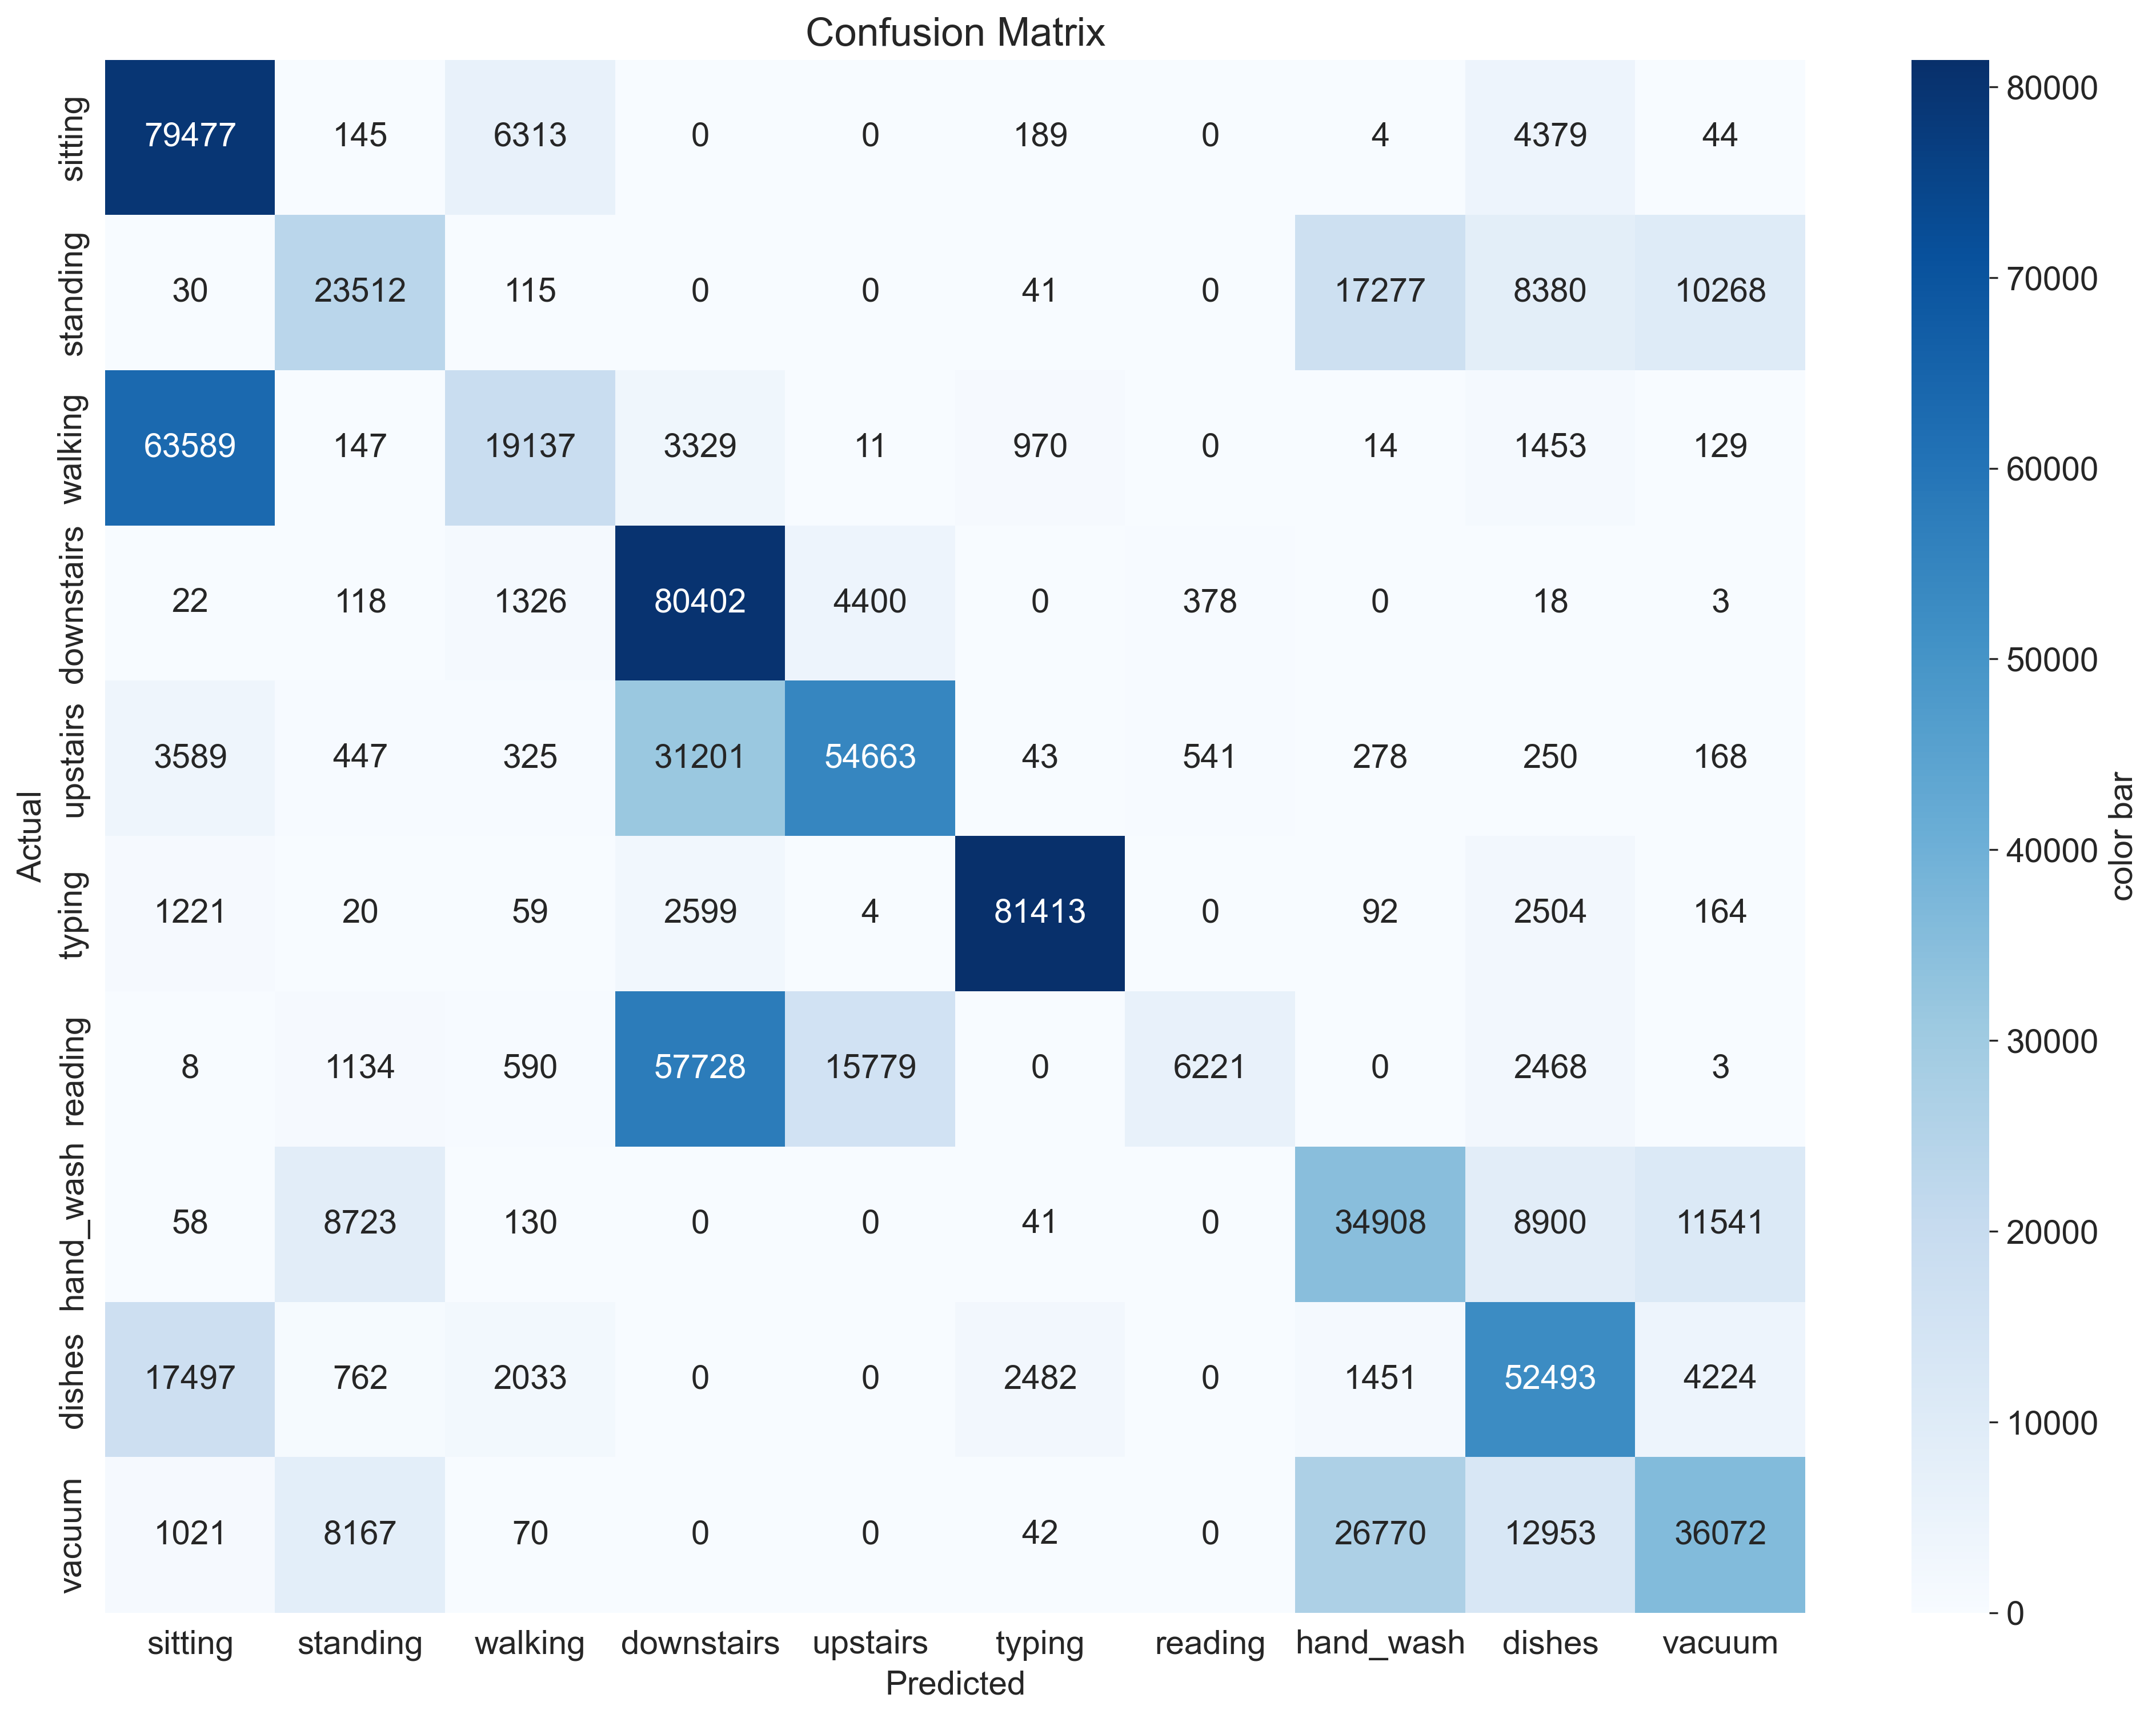

In [100]:
from matplotlib.pyplot import figure

figure(figsize=(16, 12), dpi=300)
y_pred = classifier.predict(X)
cm = confusion_matrix(y, y_pred)
# accuracy_score(y_test, y_pred)
# print("Confusion Matrix:")
# print(cm)
# --- ---- ---- heatmap
# correct the orders of label categories (double check)
sns.heatmap(cm,cmap="Blues",annot=True,
            cbar_kws={"orientation":"vertical","label":"color bar"},
            xticklabels=['sitting', 'standing', 'walking', 'downstairs', 'upstairs', 'typing', 'reading', 'hand_wash', 'dishes','vacuum'],yticklabels=['sitting', 'standing', 'walking', 'downstairs', 'upstairs', 'typing', 'reading', 'hand_wash', 'dishes','vacuum'], fmt='g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()